<a href="https://colab.research.google.com/github/mam661/CounterGEDI/blob/master/manualKaplanMeier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install lifelines


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 6.0 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=1e5b0f4eace3b8440e864319dedab9e388a598d80bc7d882a93928cfc27fd8a3
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [ ]:
import pandas as pd
import matplotlib as plt
import numpy as np
from lifelines import KaplanMeierFitter

df = pd.read_excel("mumData.xlsx")

df = df.drop(['NHSNumber', 'Surname', 'DOB', 'SACT'], axis=1)
df

obs = pd.DataFrame()



In [ ]:
def progressionFree(df):
  T = df['PFSM']
  E = df['PFSDED']
  kmf = KaplanMeierFitter()
  kmf.fit(T, E)

  ci = kmf.confidence_interval_survival_function_
  ts = ci.index
  low, high = np.transpose(ci.values)

  plt.pyplot.fill_between(ts, low, high, color='lightblue', alpha=0.3)

  kmf.plot(show_censors=True, ci_alpha=0, censor_styles={'marker': '|'})

  plt.pyplot.xlabel('Progression Free Survival/ Months')
  plt.pyplot.ylabel('Proportion alive')
  plt.pyplot.ylim(0)
  plt.pyplot.grid(True)
  plt.pyplot.ylabel('Survival Function')


In [ ]:
def progressionFreeSplit(df):

  df1 = df[df['Factor'] == 1]

  df2 = df[df['Factor'] == 2]

  T1 = df1['PFSM']
  E1 = df1['PFSDED']

  T2 = df2['PFSM']
  E2 = df2['PFSDED']

  kmf1 = KaplanMeierFitter(label='Factor 1')
  kmf2 = KaplanMeierFitter(label='Factor 2')

  kmf1.fit(T1, E1)

  kmf2.fit(T2, E2)

  ci1 = kmf1.confidence_interval_survival_function_
  ci2 = kmf2.confidence_interval_survival_function_

  ts1 = ci1.index
  low1, high1 = np.transpose(ci1.values)

  ts2 = ci2.index
  low2, high2 = np.transpose(ci2.values)

  plt.pyplot.fill_between(ts1, low1, high1, color='lightblue', alpha=0.3)

  plt.pyplot.fill_between(ts2, low2, high2, color='yellow', alpha=0.3)

  kmf1.plot(show_censors=True, ci_alpha=0, censor_styles={'marker': '|'})
  kmf2.plot(show_censors=True, ci_alpha=0, censor_styles={'marker': '|'})

  plt.pyplot.xlabel('Progression Free Survival/ Months')
  plt.pyplot.ylabel('Proportion alive')
  plt.pyplot.ylim(0)
  plt.pyplot.grid(True)
  plt.pyplot.ylabel('Survival Function')

In [ ]:
def overall(df):
  T = df['OSM']
  E = df['DED']
  kmf = KaplanMeierFitter()
  kmf.fit(T, E)

  ci = kmf.confidence_interval_survival_function_
  ts = ci.index
  low, high = np.transpose(ci.values)

  plt.pyplot.fill_between(ts, low, high, color='lightblue', alpha=0.3)

  kmf.plot(show_censors=True, ci_alpha=0, censor_styles={'marker': '|'})

  plt.pyplot.xlabel('Overall Survival/ Months')
  plt.pyplot.ylabel('Proportion alive')
  plt.pyplot.ylim(0)
  plt.pyplot.grid(True)
  plt.pyplot.ylabel('Survival Function')

In [ ]:
def overallSplit(df):

  df1 = df[df['Factor'] == 1]

  df2 = df[df['Factor'] == 2]


  T1 = df1['OSM']
  E1 = df1['DED']

  T2 = df2['OSM']
  E2 = df2['DED']

  kmf1 = KaplanMeierFitter(label='Factor 1')
  kmf2 = KaplanMeierFitter(label='Factor 2')

  kmf1.fit(T1, E1)

  kmf2.fit(T2, E2)


  ci1 = kmf1.confidence_interval_survival_function_
  ci2 = kmf2.confidence_interval_survival_function_

  ts1 = ci1.index
  low1, high1 = np.transpose(ci1.values)

  ts2 = ci2.index
  low2, high2 = np.transpose(ci2.values)

  plt.pyplot.fill_between(ts1, low1, high1, color='lightblue', alpha=0.3)

  plt.pyplot.fill_between(ts2, low2, high2, color='yellow', alpha=0.3)

  kmf1.plot(show_censors=True, ci_alpha=0, censor_styles={'marker': '|'})
  kmf2.plot(show_censors=True, ci_alpha=0, censor_styles={'marker': '|'})

  plt.pyplot.xlabel('Overall Survival/ Months')
  plt.pyplot.ylabel('Proportion alive')
  plt.pyplot.ylim(0)
  plt.pyplot.grid(True)
  plt.pyplot.ylabel('Survival Function')


In [73]:
#Functions are as follows:

#For overall survival with combined factors, enter: overall(df)

#For overall survival with split factors, enter: overallSplit(df)

#For progression free survival with combined factors, enter: progressionFree(df)

#For progression free survival with split factors, enter: progressionFreeSplit(df)



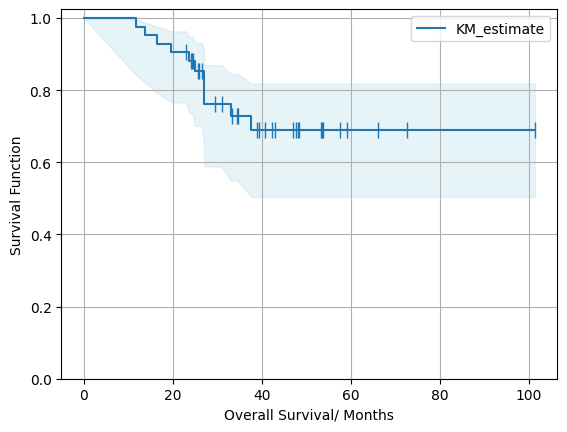